## Dataset

O nosso dataset providencia-nos dados geográficos e contagem de casos confirmados, óbitos e recuperados do Covid-19 num periodo de  4 meses (22 de janeiro de 2020 a 5 de maio de 2020) em vários países. O objetivo será extrair informação dos dados de forma a podermos construir um modelo de regressão capaz de prever as contagens tendo por base os fatores disponiveis (localização geográfica, dia e contagem anterior). Assim sendo é necessário partir dos dados iniciais e proceder a um pré-processamento para tratar os dados e poder-se então utlizar os algoritmos de regressão que pretendemos utilizar.

### Variáveis independentes

Como foi supramencionado, pretendemos utilizar certos fatores para fundamentarmos a nossa previsão (partindo dos dados do dataset). Estes então serão as coordenadas geográficas (Latitude e Longitude), número de dias desde o inicio da previsão (ou seja, 22 de janeiro) e contagens anteriores (número de casos confirmados, óbitos e recuperados do dia anterior).

### Variáveis Dependentes

Os valores que vamos prever serão os números de casos confirmados, óbitos e recuperados, sendo então estas as nossas variáveis independentes.

## Tratamento de dados

Para podermos obter resultados fiáveis, é preciso haver um tratamento dos dados que vem do dataset.
Pegando dos dados processados anteriormente feito inicialmente, começamos por extrai-los do ficheiro para podermos manipulá-los.

In [3]:
import pandas as pd

covid_data = pd.read_csv('covid_19_clean_complete.csv')
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27451,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27452,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27453,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27454,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


De seguida, após uma análise, verificou-se a presença de entrada respeitantes a navios que nalgum momento tiveram casos de Covid-19 e não estão portanto associados a nenhum país particular.
Além disso, consideramos que estes dados iriam criar ruído, pelo que optamos por ignorá-los e remover dos dados em análise.

In [2]:
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Grand Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='MS Zaandam'].index)
covid_data = covid_data.reset_index()
del covid_data['index']
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27035,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27036,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27037,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27038,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


A maioria das entradas da coluna **Province/State** tem valores nulos, pelo que procedemos a eliminá-los. Além disso, como ter uma entrada para uma região e país não é muito relevante, optamos por agregar as duas informações numa só coluna denominada de **Local**.

In [3]:
import numpy as np

covid_data['Province/State'] = covid_data.replace(np.nan, '', regex=True)
cols = ['Province/State', 'Country/Region']
covid_data['Local'] = covid_data[cols].apply(lambda row: ' / '.join(row.values.astype(str)) if row.values[0] != '' else ''.join(row.values.astype(str)), axis=1)
del covid_data['Province/State']
del covid_data['Country/Region']
covid_data

,Lat,Long,Date,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,1/22/20,0,0,0,Afghanistan
1,41.153300,20.168300,1/22/20,0,0,0,Albania
2,28.033900,1.659600,1/22/20,0,0,0,Algeria
3,42.506300,1.521800,1/22/20,0,0,0,Andorra
4,-11.202700,17.873900,1/22/20,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,5/4/20,6,0,5,Western Sahara
27036,0.186360,6.613081,5/4/20,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,5/4/20,12,2,0,Yemen
27038,-11.645500,43.333300,5/4/20,3,0,0,Comoros


De seguida, vamos converter as datas em contagem de dias desde o início do dataset (22 de janeiro de 2020)

In [4]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'],format='%m/%d/%y')
covid_data['Date'] -= pd.to_datetime("2020-01-22")
covid_data['Date'] /= np.timedelta64(1,'D')
covid_data = covid_data.rename(columns  = {'Date':'Days Passed'})
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,0.0,0,0,0,Afghanistan
1,41.153300,20.168300,0.0,0,0,0,Albania
2,28.033900,1.659600,0.0,0,0,0,Algeria
3,42.506300,1.521800,0.0,0,0,0,Andorra
4,-11.202700,17.873900,0.0,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,103.0,12,2,0,Yemen
27038,-11.645500,43.333300,103.0,3,0,0,Comoros


Por fim, adicionar as colunas da contagem do dia anterior. Este passo é um pouco mais longo tendo em conta o numero de linhas e a procura pelo valor anterior.

In [5]:
covid_data['Conf. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Confirmed'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Deaths Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Deaths'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Recov. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Recovered'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
0,33.000000,65.000000,0.0,0,0,0,Afghanistan,0,0,0
1,41.153300,20.168300,0.0,0,0,0,Albania,0,0,0
2,28.033900,1.659600,0.0,0,0,0,Algeria,0,0,0
3,42.506300,1.521800,0.0,0,0,0,Andorra,0,0,0
4,-11.202700,17.873900,0.0,0,0,0,Angola,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara,6,0,5
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe,16,1,4
27037,15.552727,48.516388,103.0,12,2,0,Yemen,10,2,0
27038,-11.645500,43.333300,103.0,3,0,0,Comoros,3,0,0


In [6]:
with pd.ExcelWriter('covid19_dataset_final.xlsx') as writer:
    covid_data.to_excel(writer)

## **Support Vector Regression** 

utiliza conceitos semelhantes aos aplicados no algoritmo de Support Vector Machine para aplicações em métodos de regressão.

Deste modo serão expostos alguns conceitos teóricos fundamentais para que se possa compreender este algoritmo:
-  **Hyper Plane** : Linha que se tentará melhor adaptar aos valores existentes.
-  **Boundary line** : Margens da hyperplane que separam os valores existentes.
-  **Support vectors** : Os pontos mais perto da "boundary line". A distância dos pontos é a minima.
    
Assim, neste algoritmo o objetivo é considerar os valores dentro da margem, ou seja aqueles com menor erro entre eles. Assim o objetivo é descobrir um hyper plain que mais se aproxime aos valores existentes, ou seja, que se tenha uma distância minima a um maior número destes pontos.

Desta forma a aplicação deste algoritmo vai ser feita auxiliando-nos da implementação presente na ferramenta **scikit-learn**. 

### MultiOutputRegressor
O uso de apenas este algoritmo não possibilita a previsão para mais do que um output.
Assim, foi preciso auxiliarmo-nos num "wrapper" - **MultiOutputRegressor** - de forma a conseguirmos
contornar este problema. Esta classe irá criar uma instância do modelo para cada um dos outputs do problema.

Contudo como referido, é criado um modelo separado para cada output. Consequentemente, esta
solução não consegue garantir a dependência entre as várias varíáveis, ou seja, assume que
os outputs são totalmente independentes uns dos outros. 

No contexto deste problema os outputs tem relação entre si uma vez que o maior número de casos confirmados 
implicam um maior número de mortes e recuperados. Apesar disto, decidimos avançar na mesma com este algoritmo uma
vez que a dependência entre os vários outputs poderá não ser assim tão significativa para os resultados finais.

#### Parâmetros da pesquisa

   * **kernel** : Método para usar um classificador linear em problemas não lineares.
     * poly
   * **epsilon**: Define a margem de tolerância onde não é atribuida penalidade a erros.
     * 0.1(default),0.2,1
   * **cache size**: Especifica tamanho da cache do kernel; permite diminuir o tempo de execução 
     * 500    
   * **C** : Relativo à penalização dada a classificações incorretas. Quanto maior o valor, menor será a margem do hyperplane e consequentemente tolera menos erros pelo que os valores serão mais "corretos". 
     * 1(default),5,10
   * **gamma**: Coeficiente para o kernel. 
      * scale (default):  1 / (n_features * X.var())  , auto:  1 / n_features
      
   
### Criação dos sets de treino e teste
Procedemos então à criação de sets para podermos treinar o nosso modelo, e por fim testá-lo. Antes disso, escalamos os valores para ficarem normalizados.

In [7]:
from sklearn.model_selection import train_test_split

#colunas em que vamos basear as previsões
x_columns = ['Lat','Long','Days Passed', 'Conf. Prev.','Deaths Prev.','Recov. Prev.']
#colunas que queremos prever
y_columns = ['Confirmed','Deaths','Recovered']

#criar set de treino e teste
X_train, X_test, y_train, y_test = train_test_split(covid_data[x_columns], covid_data[y_columns], test_size=0.0096)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
unscaled_test = X_test.join(y_test)
X_test = scaler.transform(X_test)

### Execução

Uma vez feita a preparação dos dados, avançamos então para a execução.

Para este algoritmo foi mecanizado o processo de obtenção de resultados de forma a para testar as várias combinações possíveis e encontrar qual a que melhores resultados produz.


In [11]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import *

def runRegressor(params) :
    
    regressor = SVR(kernel=params[0], epsilon=params[1], C=params[2], gamma=params[3],cache_size=1000)
    wrapper = MultiOutputRegressor(regressor)
    #aplicar a função de fit ao set de treino
    wrapper.fit(X_train,y_train)
    #fazer previsões do set de teste usando 
    predictions = wrapper.predict(X_test)
    #guardar os valores de previsão para cálculo das métricas
    y_pred = predictions
    
    #tratar dos resultados
    predictions = pd.DataFrame(data=predictions,columns=['Confirmed Prediction','Deaths Prediction','Recovered Prediction'])

    #buscar os locais para apresentar as previsoes, ja que nao foram usados no modelo de regressão
    predictions['Local'] = unscaled_test.apply(lambda row: covid_data.loc[(covid_data['Lat'] == row['Lat']) & (covid_data['Long'] == row['Long']),'Local'].iloc[0],axis=1).tolist()

    #arredondar os valores para inteiros, com teto
    predictions['Confirmed Prediction'] = predictions['Confirmed Prediction'].apply(np.ceil)
    predictions['Deaths Prediction'] = predictions['Deaths Prediction'].apply(np.ceil)
    predictions['Recovered Prediction'] = predictions['Recovered Prediction'].apply(np.ceil)

    #comparar os valores previstos e reais guardar a diferença nas contagens
    predictions['Confirmed Actual'] = unscaled_test['Confirmed'].tolist()
    predictions['Deaths Actual'] = unscaled_test['Deaths'].tolist()
    predictions['Recovered Actual'] = unscaled_test['Recovered'].tolist()
    #colocar o numero de dias passados para ser mais facil analisar
    predictions['Days Passed'] = unscaled_test['Days Passed'].tolist()

    predictions = predictions[['Days Passed','Local', 'Confirmed Prediction', 'Confirmed Actual','Deaths Prediction', 'Deaths Actual','Recovered Prediction','Recovered Actual']]
    
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2  = r2_score(y_test,y_pred)
    
    results = {"params": params, "data": predictions,"mse" : mse, "mae": mae,"r2":r2}
    return results



Tendo a base de uma execução feita, podemos mecanizar este processo para testar as várias combinações possíveis e encontrar qual a que melhores resultados produz.

Assim, as diferentes combinações aplicadas assumem combinações dos seguintes valores nos parâmetros:
* kernel = poly
* epsilon = 0.1,0.2,1
* cache_size = 1000
* C = 1,5,10
* gamma = auto, scale

In [12]:
kernel=['poly']
epsilon=[0.1,0.2,1]
C=[1,5,10]
gamma = ['scale','auto']
import itertools

params = {"kernel" : kernel, "epsilon" : epsilon, "C": C, "gamma" : gamma}

combinations = [] 
for p in itertools.product(*params.values()):
    combinations.append(p)
 

In [14]:
import time

results = []
i = 0
for params in combinations:
    start_time = time.time()
    collect_data = runRegressor(params)
    t =  round((time.time()-start_time),4)
    results.append(collect_data)
    write_data = collect_data['data']
    data_params = {'Params':  [collect_data['params'][0],collect_data['params'][1],collect_data['params'][2],collect_data['params'][3]]}
    data_stats = {'Stats':  [collect_data['mse'], collect_data['mae'], collect_data['r2']]}
    data_time = {'Time':  [t]}
    df1 = pd.DataFrame(data_params, columns = ['Params'])
    df2 = pd.DataFrame(data_stats, columns = ['Stats'])
    df3 = pd.DataFrame(data_time, columns = ['Time'])
    write_data = pd.concat([df1,df2,df3,write_data], ignore_index=True, axis=1)
    with pd.ExcelWriter('svr' + str(i) + '.xlsx') as writer:
         write_data.to_excel(writer)
    i+=1
    

### Extração dos Resultados de Ficheiros

Uma vez que a execução de todas as diferentes combinações exige tempo de execução, assim como recursos computacionais, os resultados foram guardados em formato xlsx de forma a puderem ser novamente extraídos para análise sem terem de ter de ser calculados inúmeras vezes.

Assim de seguida efetua-se a extração dos dados dos ficheiros.

In [5]:
import pandas as pd
import math
results = []

import itertools

for i in range(17):
    dfs = pd.read_excel('Results_SVR/svr' + str(i) + '.xlsx')
    kernel = dfs[0][0]
    epsilon = dfs[0][1]
    C = dfs[0][2]
    gamma = dfs[0][3]
    MSE = dfs[1][0]
    MAE = dfs[1][1]
    R2 = dfs[1][2]
    ti = dfs[2][0]
    del dfs[0]
    del dfs[1]
    del dfs[2]
    del dfs[3]
    dfs.rename(columns={list(dfs)[0]: "Days Passed",list(dfs)[1]: "Local", list(dfs)[2]: "Confirmed Prediction",
                  list(dfs)[3]:"Confirmed Actual",list(dfs)[4]:"Deaths Prediction", list(dfs)[5]: "Deaths Actual", 
                  list(dfs)[6]: "Recovered Prediction", list(dfs)[7]:"Recovered Actual" }, inplace=True)
    r = {'params': (kernel,epsilon, C, gamma), 
                  'time':ti,'mse': MSE, 'mae': MAE, 'r2': R2, 'data': dfs}
    results.append(r)


## Análise de dados

Neste momento já podemos analisar os resultados obtidos e encontrar qual é o melhor set de parâmetros do regressor, recorrendo à ferramenta Seaborn.
Vamos avaliar os erros obtidos, bem como o valor do coeficiente de determinação R². É de relembrar que quanto melhor forem os modelos maior será o valor de R² (1 é o ideal).

Como as combinações são muito grandes (18), vamos primeiro filtrar as opções para o top 5 de cada categoria. Isto é, as combinações que obtiveram melhores resultados no MSE (erro quadrático médio), MAE (erro absoluto médio), R² e tempo.

Posteriormente, analisaremos graficamente os resultados obtidos.

In [7]:
mse_top = [None]*5
mae_top = [None]*5
time_top = [None]*5
r2_top = [None]*5
def updateMSE(mse):
    for i in range(5):
        if mse_top[i] == None:
            mse_top[i] = mse
            return
        elif mse_top[i]["mse"] > mse["mse"]:
            old_top = mse_top[i]
            mse_top[i] = mse
            updateMSE(old_top)
            return
        
def updateMAE(mae):
    for i in range(5):
        if mae_top[i] == None:
            mae_top[i] = mae
            return
        elif mae_top[i]["mae"] > mae["mae"]:
            old_top = mae_top[i]
            mae_top[i] = mae
            updateMAE(old_top)
            return      
        
def updatetime(t):
    for i in range(5):
        if time_top[i] == None:
            time_top[i] = t
            time_top
            return
        elif time_top[i]["time"] > t["time"]:
            old_top = time_top[i]
            time_top[i] = t
            updatetime(old_top)
            return   
        
def updateR2(r2):
    for i in range(5):
        if r2_top[i] == None:
            r2_top[i] = r2
            return
        elif r2_top[i]["r2"] < r2["r2"]:
            old_top = r2_top[i]
            r2_top[i] = r2
            updateR2(old_top)
            return
        
        
max_mse = 0
max_mae = 0
max_time = 0
min_r2 = None
for result in results:
    updateMSE(result)
    updateMAE(result)
    updateR2(result)
    updatetime(result)
    if result["mse"] > max_mse:
        max_mse = result["mse"]
    if result["mae"] > max_mae:
        max_mae = result["mae"]
    if result["time"] > max_time:
        max_time = result["time"]
    if min_r2 == None or result["r2"] < min_r2:
        min_r2 = result["r2"]
        
print("Filtered best results.\nMaximum MSE: {}\nMaximum MAE: {}\nMinimum R2: {} \nMaximum Time: {}".format(max_mse,max_mae,min_r2,max_time))


Filtered best results.
Maximum MSE: 60959141.63717949
Maximum MAE: 1116.597435897436
Minimum R2: 0.6400441420509662 
Maximum Time: 219.1347


In [8]:
top_data = set(tuple((top["params"],top["r2"],top["mse"],top["mae"],top["time"]) for top in mse_top))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"],top["time"]) for top in mae_top)))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"],top["time"]) for top in r2_top)))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"],top["time"]) for top in time_top)))

ranking = pd.DataFrame(data=top_data,columns=['Combinations','R2','MSE','MAE','Time'])
ranking = ranking.sort_values(['R2','MSE','MAE','Time'],ascending=[False,True,True,True])
ranking  = ranking.reset_index()
del ranking['index']

with pd.ExcelWriter('covid19_knn_regressor_rank.xlsx') as writer:
    ranking.to_excel(writer)

ranking

,Combinations,R2,MSE,MAE,Time
0,"(poly, 1, 10, scale)",0.805291,4.295898e+07,937.993590,219.1347
1,"(poly, 0.2, 10, scale)",0.805255,4.295983e+07,937.987179,159.1613
2,"(poly, 0.2, 10, auto)",0.805255,4.295983e+07,937.987179,163.5467
3,"(poly, 0.1, 10, scale)",0.805254,4.295979e+07,937.980769,178.7866
4,"(poly, 0.1, 10, auto)",0.805254,4.295979e+07,937.980769,180.5983
5,"(poly, 1, 1, auto)",0.640100,6.095862e+07,1116.597436,67.3304
6,"(poly, 1, 1, scale)",0.640100,6.095862e+07,1116.597436,67.7108
7,"(poly, 0.2, 1, auto)",0.640045,6.095914e+07,1116.593590,91.8192
8,"(poly, 0.1, 1, auto)",0.640044,6.095898e+07,1116.585897,62.5515
9,"(poly, 0.1, 1, scale)",0.640044,6.095898e+07,1116.585897,62.6059


Como se pode verificar, temos algumas combinações de parâmetros que se destacam. 

Ao nível do coeficiente R², todas obtiveram resultados medianos, com os melhores a chegar ao 0.80, o que nos indica que as previsões obtidas se encontram próximas dos dados reais, mas não tão próximas como desejariamos, ou seja, este modelo não se "ajusta" na perfeição aos dados (**fitness**). 

Em relação ao erro absoluto médio, observam-se resultados medianos na generalidade dos casos. 

Sendo assim, verifica-se que com **C** a **10** se obtém os melhores resultados, ou seja atribuindo uma maior penalização a erros. Curiosamente, de forma oposta, uma maior margem de tolerância onde não é atribuida penalidade a erros obtém melhores resultados, já que o maior valor de **epsilon** ,**1** obtém melhores resultados, seguindo-se do **0.2** e do **0.1**. Em relação a **gamma** destaca-se nos primeiros o **scale** apesar da opção **auto** não eliminar completamente a possibilidade de obter bons resultados. Também de notar que opções com melhores resultados são as que mais tempo demoram a executar.

Apesar de todas estas combinações aqui apresentadas serem muito boas, existe uma que supera todas as outras.
Com **kernel=poly**, **peso** com base em **distância**, **epsilon** de **1**, **C** de 10, e **gamma** a scale, obteve-se os melhores resultados do modelo de regressão *Suport Vector Regressor*.

### Representação dos Resultados

#### Comparação entre diferentes combinações e as suas relações com os valores reais

Para concluir sobre a generalidade do modelo de regressão com o algoritmo SVR, vamos apresentar um *regression plot* que para todos os resultados obtidos relacione cada variável dependente prevista e real. Isto é, comparar o rácio de casos confirmados, óbitos e recuperados, previstos e reais.

In [9]:
total_results = results[0]['data']
for i in range(1,len(results)):
    total_results = total_results.append(results[i]['data'],ignore_index=True)
del total_results['Days Passed']
del total_results['Local']
total_results

conf_pred = total_results['Confirmed Prediction']
conf_actual = total_results['Confirmed Actual']
deaths_pred = total_results['Deaths Prediction']
deaths_actual = total_results['Deaths Actual']
recovered_pred = total_results['Recovered Prediction']
recovered_actual = total_results['Recovered Actual']

top_result_conf_pred = r2_top[0]['data']['Confirmed Prediction']
top_result_conf_actual = r2_top[0]['data']['Confirmed Actual']
top_result_deaths_pred = r2_top[0]['data']['Deaths Prediction']
top_result_deaths_actual = r2_top[0]['data']['Deaths Actual']
top_result_recovered_pred = r2_top[0]['data']['Recovered Prediction']
top_result_recovered_actual = r2_top[0]['data']['Recovered Actual']

##### Confirmados

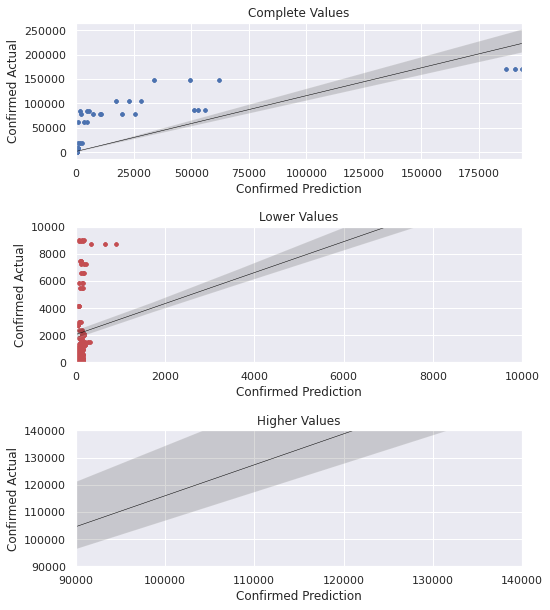

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

##### Mortes

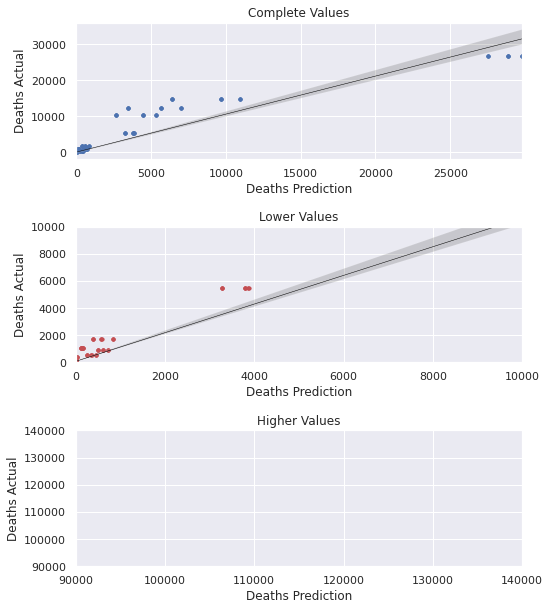

In [11]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

In [17]:
##### Recuperados

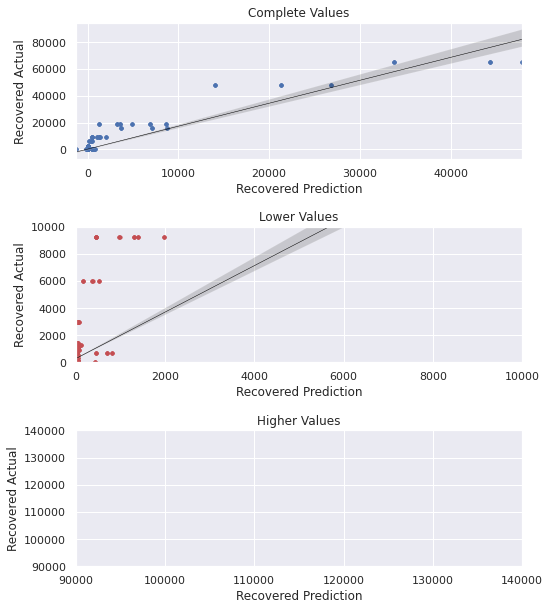

In [12]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

#### Análise do melhor resultado relativamente aos valores reais

Para concluir vamos análisar exatamente da mesma forma apenas o melhor valor obtido, para concluirmos sobre a discrepância dos resultados obtidos e dos reais

##### Confirmados

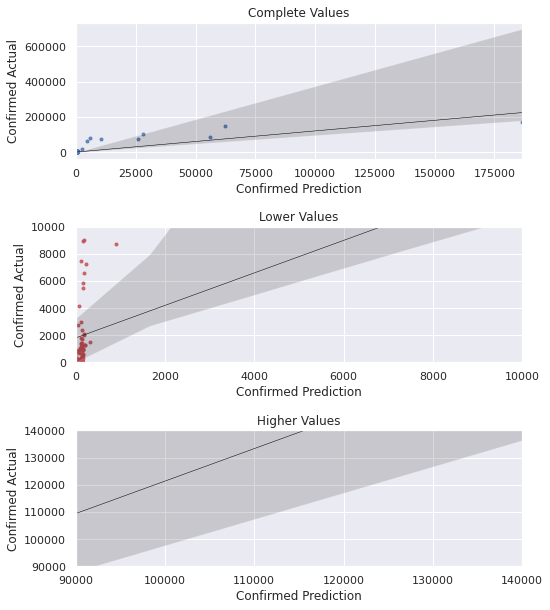

In [13]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=top_result_conf_pred, y=top_result_conf_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_conf_pred, y=top_result_conf_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_conf_pred, y=top_result_conf_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

##### Mortes

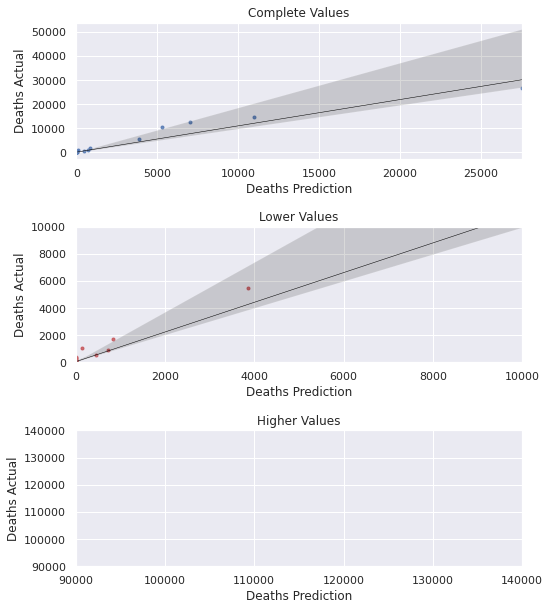

In [14]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=top_result_deaths_pred, y=top_result_deaths_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_deaths_pred, y=top_result_deaths_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_deaths_pred, y=top_result_deaths_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

##### Recuperados

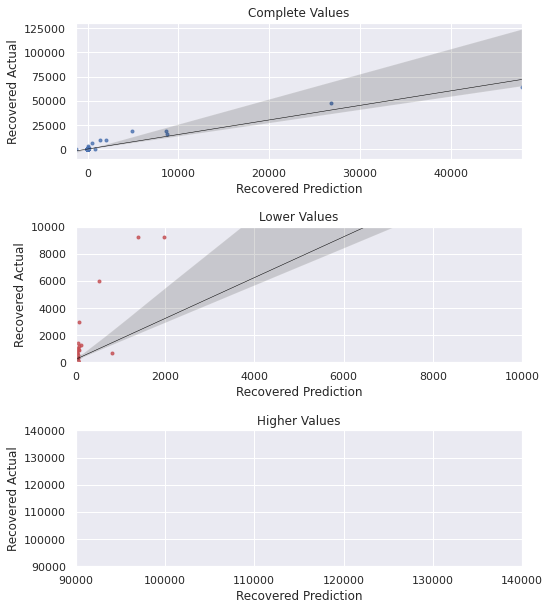

In [15]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=top_result_recovered_pred, y=top_result_recovered_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_recovered_pred, y=top_result_recovered_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_recovered_pred, y=top_result_recovered_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})